In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv(r'/Users/fredrick/Desktop/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


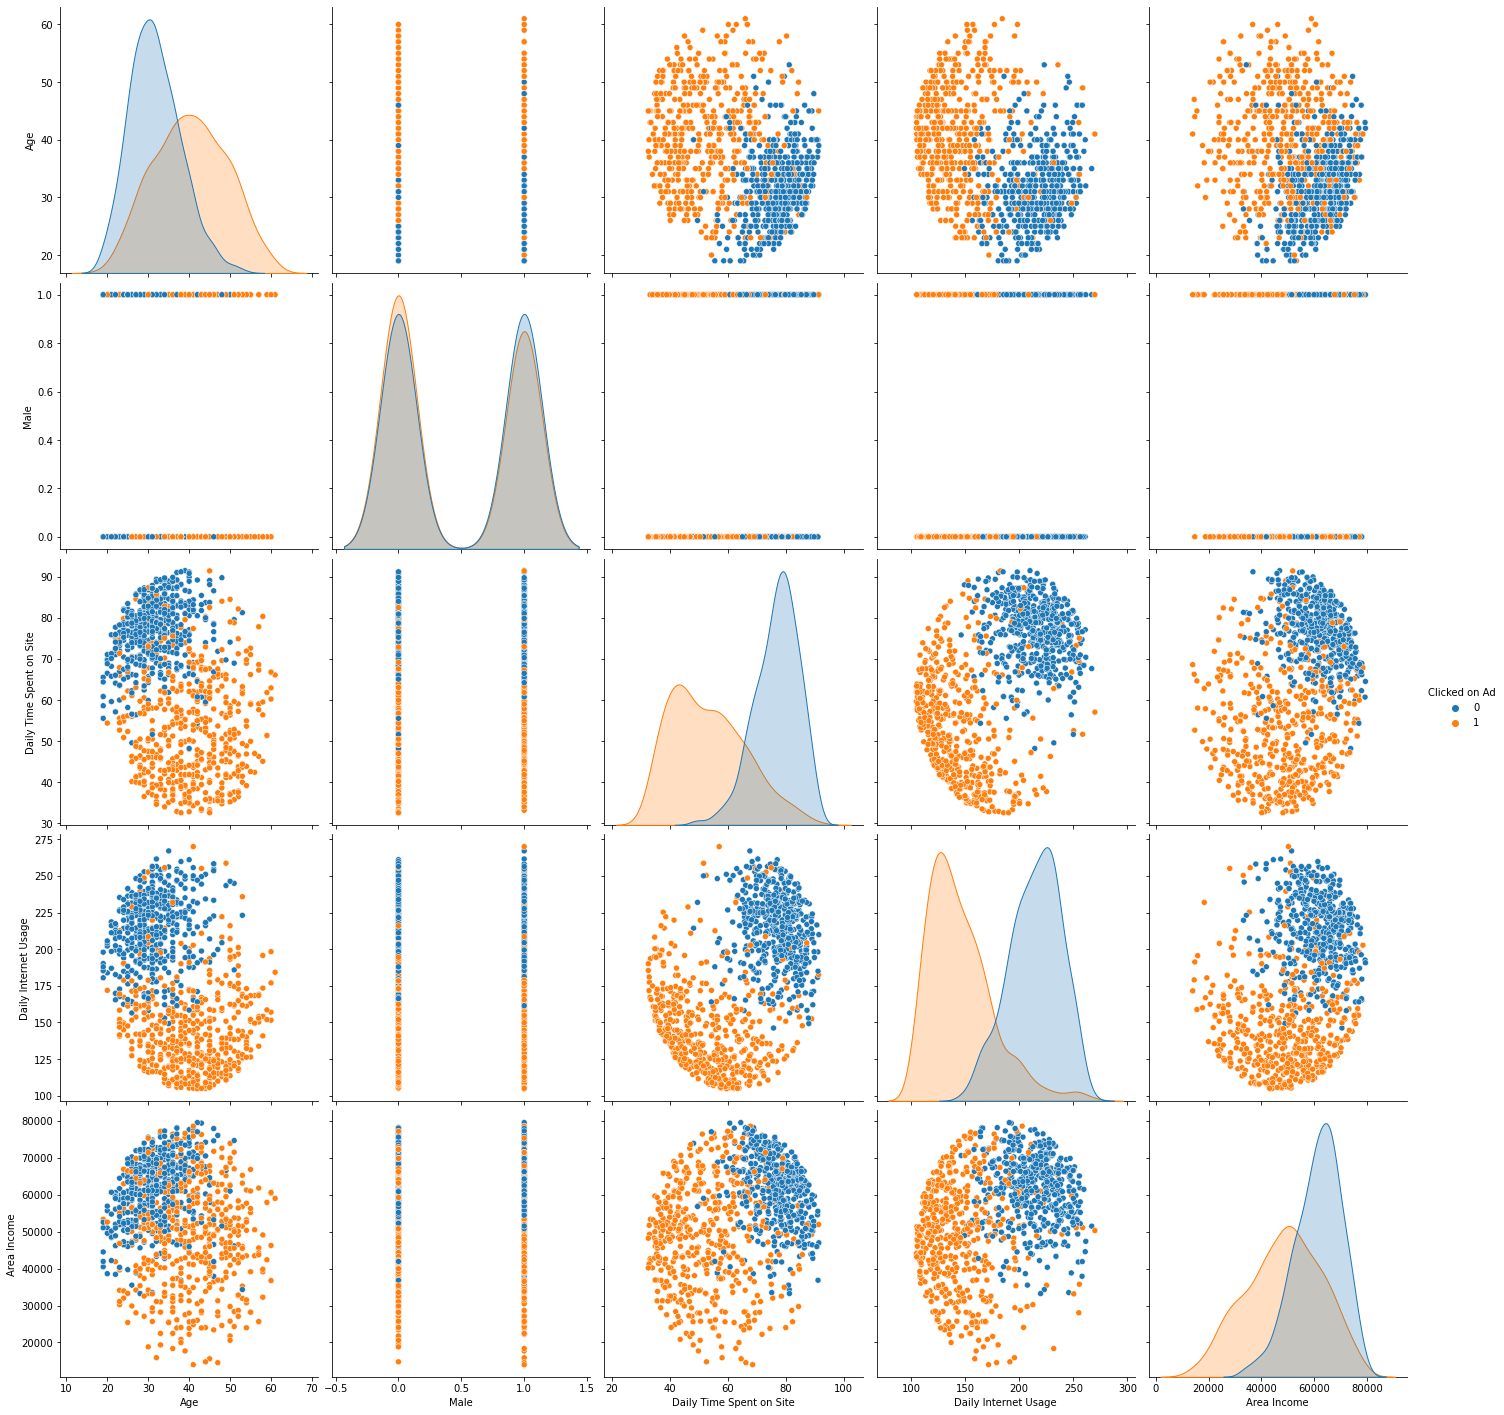

In [101]:
#透過多變量圖觀察各個變數之間與點擊廣告的關係。
#1.會點擊廣告的族群年齡主要分布在40歲，不會點擊廣告主要分布在30歲，且分佈比例較懸殊。
#2.會點擊廣告的族群平均花費在網站的時間不會太久，反之亦然。
#3.會點擊廣告的族群平均收入落在US$50,000。
#4.會點擊廣告的族群平均使用網路的時間也不會太久，反之亦然。
#5.整體消費者輪廓：40歲男性女性皆有、使用網路與花在瀏覽頁面的時間較少、收入約為年薪5萬美金。

g = sns.pairplot(df, vars=['Age', 'Male','Daily Time Spent on Site', 'Daily Internet Usage', 'Area Income'],
                 hue='Clicked on Ad', diag_kind='kde', height=4)

<AxesSubplot:>

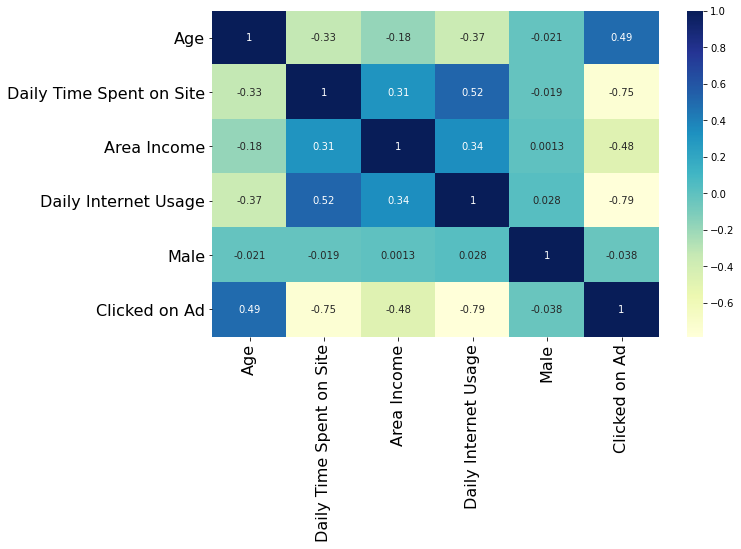

In [98]:
#以熱點圖快速瀏覽各變數之間的相關性。
#「廣告點擊」與「平均使用網路時間」呈現最高的相關性（相關係數=-0.79），平均使用網路時間越少，越有可能點擊廣告。

corr = ['Age', 'Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']
plt.figure(figsize=[10,6])
plt.xticks(size=16)
plt.yticks(size=16)
sns.heatmap(df[corr].corr(), annot=True, cmap='YlGnBu')

<AxesSubplot:xlabel='Area Income', ylabel='Density'>

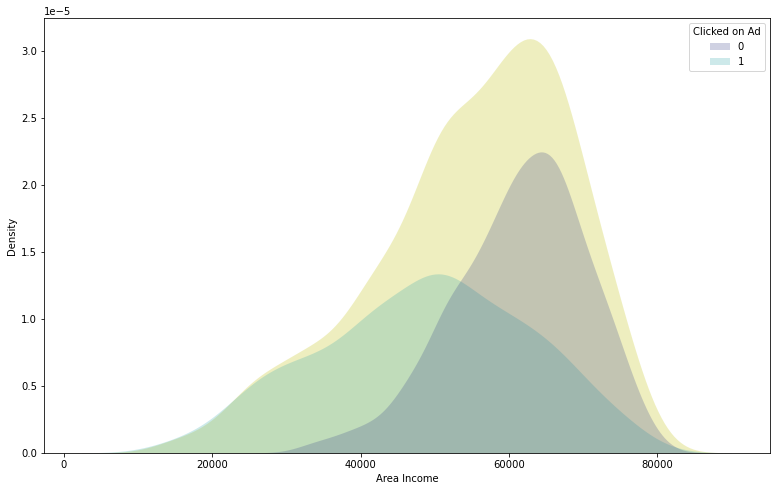

In [46]:
#以核密度圖，近一步觀察收入與是否會點擊之間的關係。
#黃色區塊代表整體收入的分佈狀況，淺綠色代表點擊廣告族群的分佈狀況，深綠色代表沒有點擊廣告族群的分佈狀況。
#可以觀察到整體平均收入落在US$60,000，而會點擊廣告族群的平均落在US$50,000，是低於整體平均的。
#另外因整體平均收入與沒有點擊廣告族群的平均收入相近，因此可以了解到在這份資料中，沒有點擊廣告的數據是佔多數的。
#可以用同樣方式，分析上面用多變量圖呈現的各個變數與點擊廣告間的關係。

plt.figure(figsize=(13,8))
sns.kdeplot(data=df, x=df['Area Income'], color='y', fill=True, linewidth=0)
sns.kdeplot(data=df, x=df['Area Income'], hue='Clicked on Ad', fill=True, palette="mako", linewidth=0)

In [120]:
#接著可以使用者輪廓範圍縮小到國家，我以點擊廣告的數據量最多的國家為例。
#先對原本的dataframe做樞紐計算數量，可以看到資料數量都非常少，我下面以澳洲為例。
df2 = df[df['Clicked on Ad'] == 1]
cdf = df2.groupby(by='Country').count().sort_values(by='Clicked on Ad', ascending=False)
cdf

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Timestamp,Clicked on Ad
Country,,,,,,,,,
Australia,7,7,7,7,7,7,7,7,7
Turkey,7,7,7,7,7,7,7,7,7
Ethiopia,7,7,7,7,7,7,7,7,7
Liberia,6,6,6,6,6,6,6,6,6
South Africa,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...
Azerbaijan,1,1,1,1,1,1,1,1,1
Kyrgyz Republic,1,1,1,1,1,1,1,1,1
Kuwait,1,1,1,1,1,1,1,1,1


In [161]:
#將國家為澳洲的資料篩選出來
df3 = df2[df2['Country'] == 'Australia']
df3

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
88,57.70,34,42696.67,109.07,Phased dynamic customer loyalty,New Tina,0,Australia,2016-03-14 23:13:11,1
208,59.51,58,39132.64,140.83,Assimilated fault-tolerant hub,Penatown,0,Australia,2016-06-16 02:01:24,1
233,78.32,28,49309.14,239.52,Synergized cohesive array,Jamesfurt,0,Australia,2016-06-26 11:52:18,1
470,43.84,36,70592.81,167.42,Public-key real-time definition,Port Jessica,0,Australia,2016-06-28 09:19:06,1
500,51.56,46,63102.19,124.85,Business-focused client-driven forecast,Helenborough,0,Australia,2016-01-07 13:58:51,1
552,56.39,58,32252.38,154.23,Programmable uniform website,West Shannon,0,Australia,2016-02-14 10:06:49,1


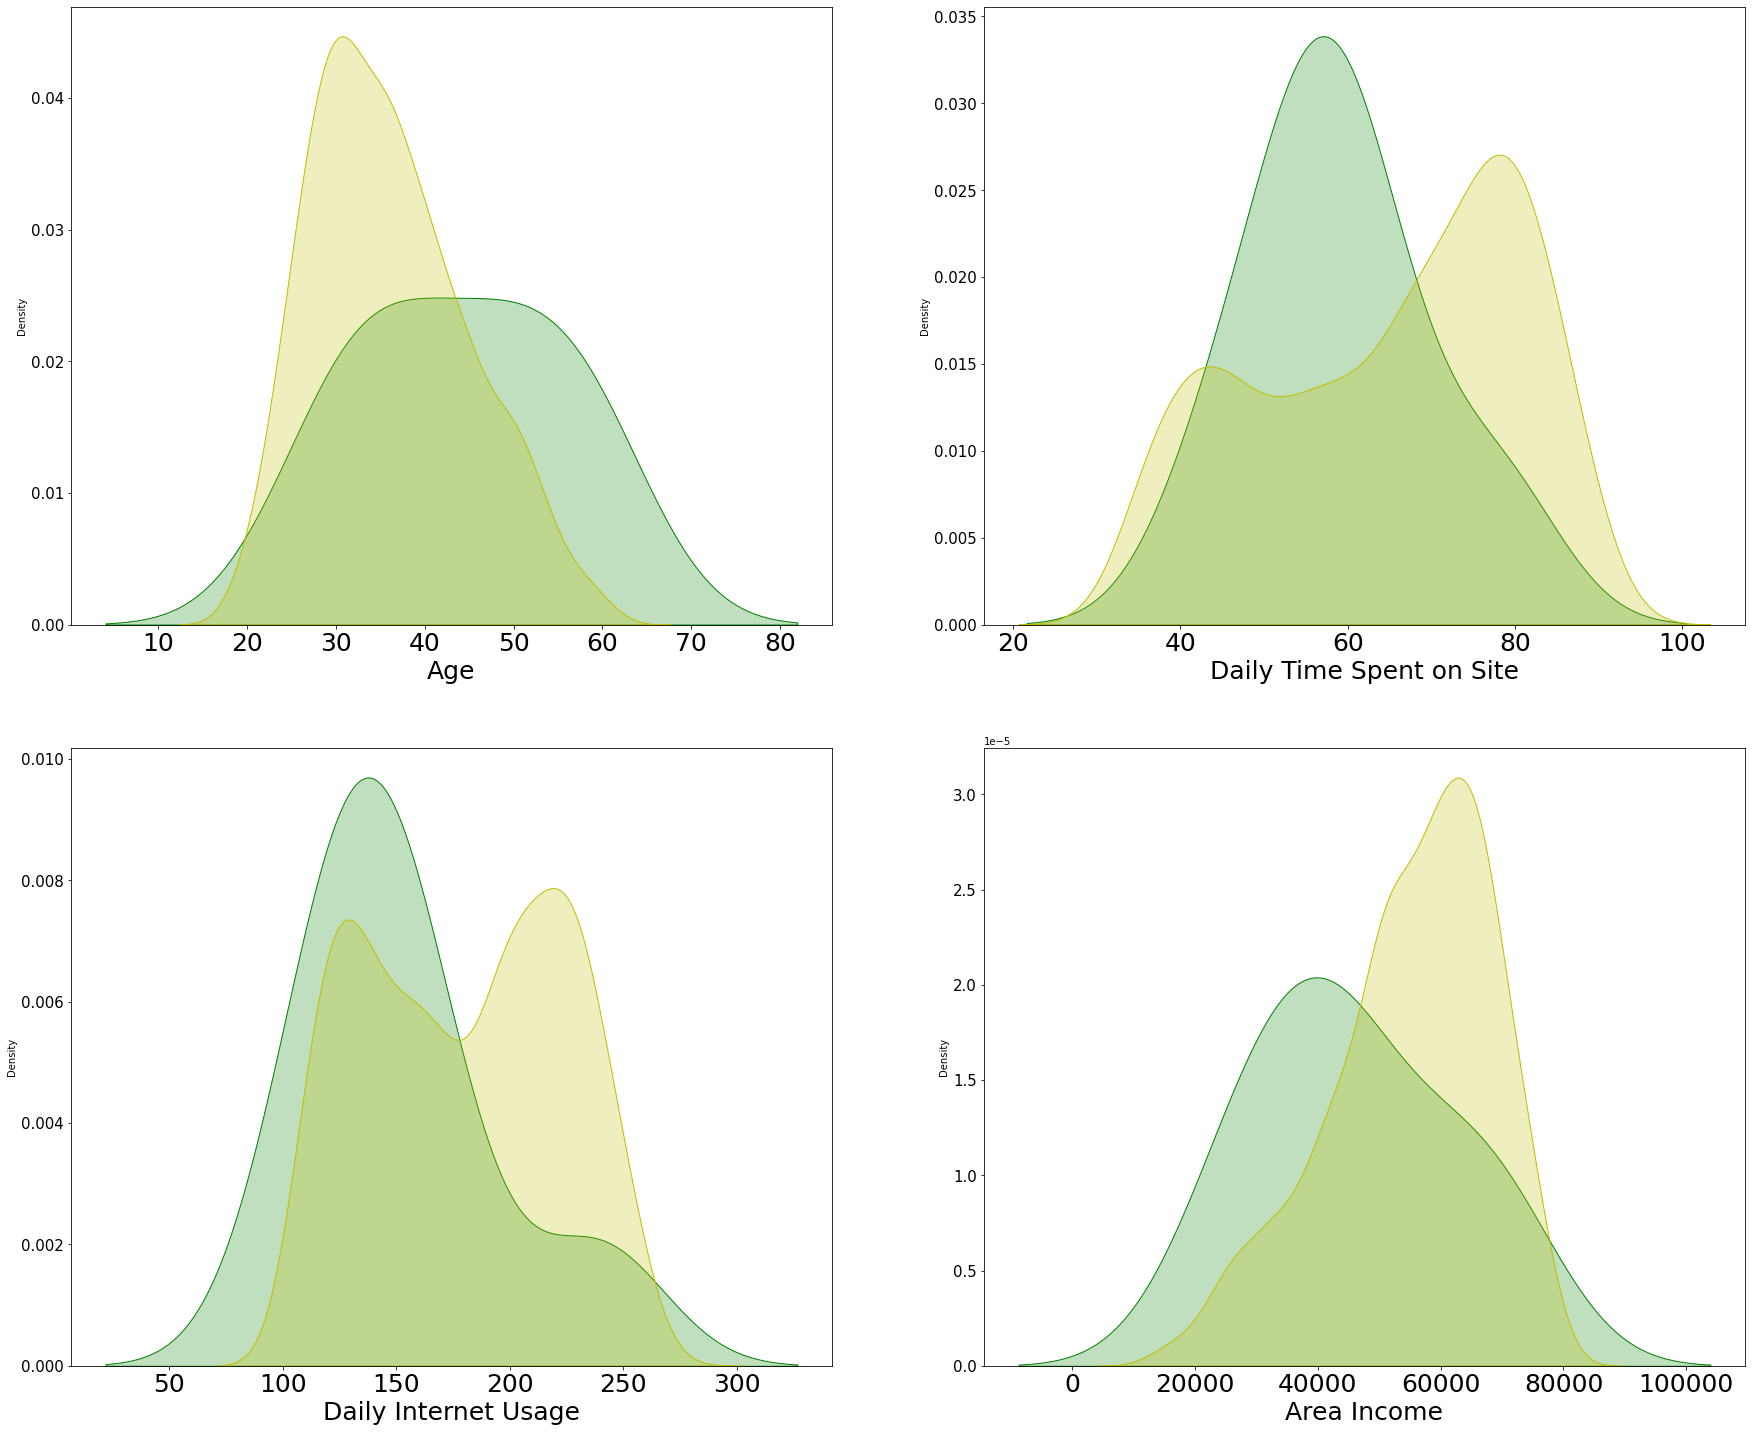

In [171]:
#對要觀察的變數畫出kde圖表，就可以清楚看出澳洲會點擊廣告的使用者輪廓，並且與所有國家的使用者比較。
#綠色為澳洲、黃色為所有國家。
#澳洲使用者輪廓：40-50歲的女性、喜歡瀏覽網站（花費在網站上的時間較長）、年收入約為US$65,000。
#澳洲使用者的年齡較整體年長、花費在網路上與網站上的時間都叫整體少、年收入也比較低，約為US$40,000。

features = ['Age', 'Daily Time Spent on Site', 'Daily Internet Usage', 'Area Income']
plt.figure(figsize=(30,25))

for i, feature in enumerate(features):
    plt.subplot(2,2,i+1)
    plt.xlabel(feature, size=25)
    plt.xticks(size=25)
    plt.yticks(size=15)
    sns.kdeplot(data=df3, x=df3[feature], fill=True, linewidth=1, color='g')
    sns.kdeplot(data=df, x=df[feature], fill=True, linewidth=1 ,color='y')

In [ ]:
#如此更能看出將資料用更小的維度去拆分的重要性，若數據再更加龐大，相信會使得消費者洞察更具有意義。
#未來優化，可以透過斷詞工具去分析Ad Topic Line的資料，並用文字雲將資料視覺化，讓行銷人員一眼看出哪些字詞的重要性較高。